In [3]:
# !pip install sympy

## 無限制式的非線性最適化問題
## Unconstrained NLP (nonlinear programming)。

```
(1) 用數理解以下的問題  
(FOC: Solve Gradient=0, SOC: check Hessian 正定)

Consider the problem:

Minimize   
f(x1, x2, x3) = (x1)^2 + x1(1 – x2) + (x2)^2 – x2x3 + (x3)^2 + x3  


First, we find the gradient with respect to xi:
∇f = [2x₁ + 1 - x₂, -x₁ + 2x₂ - x₃, -x₂ + 2x₃ + 1]ᵀ

Necessary condition FOC:
Next, we set the gradient equal to zero:

令 ∇f = 0 ，  [2x₁ + 1 - x₂, -x₁ + 2x₂ - x₃, -x₂ + 2x₃ + 1]ᵀ =  [0, 0, 0]ᵀ

So, we have a system of 3 equations and  3 unknowns.  When we solve, we get: 
 
x =  [x1, x2, x3]ᵀ =  [-1,  -1,  -1]ᵀ  ，x=H(0,0)-1 *-▽f(0,0) 
```

In [7]:
import numpy as np
from numpy.linalg import inv

def objective_function(x):
    """
    目標函數 f(x1, x2, x3) = (x1)^2 + x1(1 – x2) + (x2)^2 – x2x3 + (x3)^2 + x3
    """
    x1, x2, x3 = x
    return x1**2 + x1*(1 - x2) + x2**2 - x2*x3 + x3**2 + x3

def gradient(x):
    """
    計算梯度 ∇f = [2x₁ + 1 - x₂, -x₁ + 2x₂ - x₃, -x₂ + 2x₃ + 1]ᵀ
    """
    x1, x2, x3 = x
    return np.array([
        2*x1 + 1 - x2,
        -x1 + 2*x2 - x3,
        -x2 + 2*x3 + 1
    ])

def hessian(x):
    """
    計算Hessian矩陣
    H = [2  -1   0]
        [-1  2  -1]
        [0  -1   2]
    """
    return np.array([
        [2, -1, 0],
        [-1, 2, -1],
        [0, -1, 2]
    ])



print("\n開始求解無限制非線性最佳化問題...")
print("=" * 50)

# 1. 設定初始點
print("\n步驟 1: 設定初始點")
x_init = np.array([0, 0, 0])
print(f"初始點 x₀ = {x_init}")

# 2. 計算Hessian矩陣
print("\n步驟 2: 計算Hessian矩陣")
H = hessian(x_init)
print("Hessian矩陣 H =")
print(H)

# 3. 計算初始點的梯度
print("\n步驟 3: 計算初始點的梯度")
g = gradient(x_init)
print(f"梯度 ∇f(x₀) = {g}")

# 4. 計算Hessian的逆矩陣
print("\n步驟 4: 計算Hessian的逆矩陣")
H_inv = inv(H)
print("H⁻¹ =")
print(H_inv)

# 5. 使用公式求解最佳解
print("\n步驟 5: 使用公式 x* = -H⁻¹∇f(x₀) 求解最佳解")
x_optimal = -np.dot(H_inv, g)
print(f"最佳解 x* = {x_optimal}")

# 6. 驗證結果
print("\n步驟 6: 驗證結果")
print(f"目標函數值 f(x*) = {objective_function(x_optimal)}")
final_gradient = gradient(x_optimal)
print(f"在最佳解處的梯度 ∇f(x*) = {final_gradient}")
print(f"梯度範數 ||∇f(x*)||= {np.linalg.norm(final_gradient)}")

# 7. 檢查充分條件（SOC）
print("\n步驟 7: 檢查充分條件 (SOC)")
eigenvalues = np.linalg.eigvals(H)
is_positive_definite = np.all(eigenvalues > 0)
print(f"Hessian矩陣的特徵值: {eigenvalues}")
print(f"Hessian是否正定: {is_positive_definite}")
if is_positive_definite:
    print("由於Hessian矩陣正定，此最佳解為嚴格局部最小值")

print("=" * 50)
print("最佳化問題求解完成！")


開始求解無限制非線性最佳化問題...

步驟 1: 設定初始點
初始點 x₀ = [0 0 0]

步驟 2: 計算Hessian矩陣
Hessian矩陣 H =
[[ 2 -1  0]
 [-1  2 -1]
 [ 0 -1  2]]

步驟 3: 計算初始點的梯度
梯度 ∇f(x₀) = [1 0 1]

步驟 4: 計算Hessian的逆矩陣
H⁻¹ =
[[0.75 0.5  0.25]
 [0.5  1.   0.5 ]
 [0.25 0.5  0.75]]

步驟 5: 使用公式 x* = -H⁻¹∇f(x₀) 求解最佳解
最佳解 x* = [-1. -1. -1.]

步驟 6: 驗證結果
目標函數值 f(x*) = -1.0
在最佳解處的梯度 ∇f(x*) = [-1.11022302e-16  0.00000000e+00  3.33066907e-16]
梯度範數 ||∇f(x*)||= 3.510833468576701e-16

步驟 7: 檢查充分條件 (SOC)
Hessian矩陣的特徵值: [3.41421356 2.         0.58578644]
Hessian是否正定: True
由於Hessian矩陣正定，此最佳解為嚴格局部最小值
最佳化問題求解完成！
[-1. -1. -1.]


## (2) 用Quasi-newton演算法解i.e. gradient=0
```
Note: x1=x0+H(0,0,0)-1 * (-▽f(0,0,0))
Initial point x0=[0 0 0] ;  
H is the second derivative of the function  
H=?
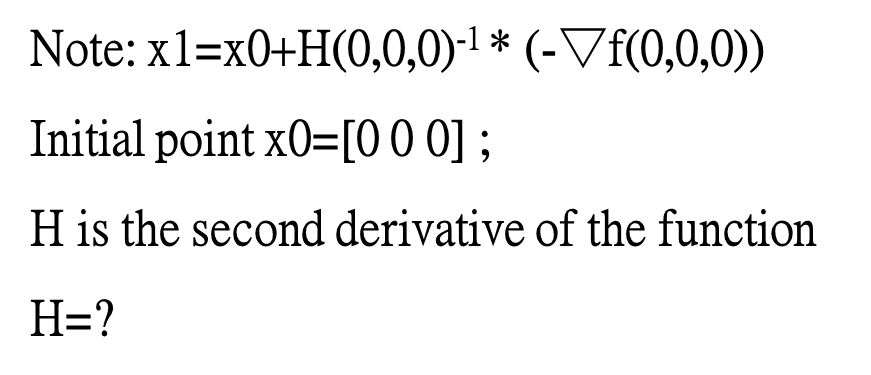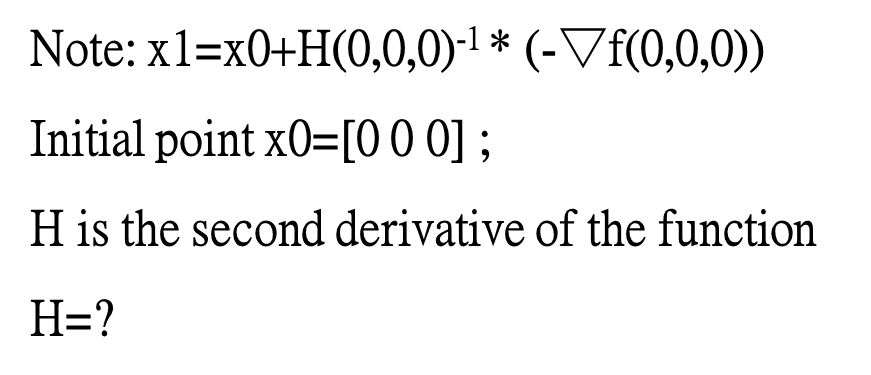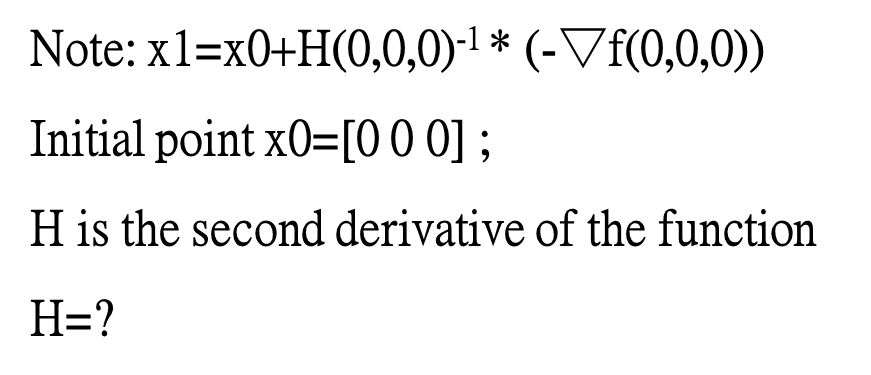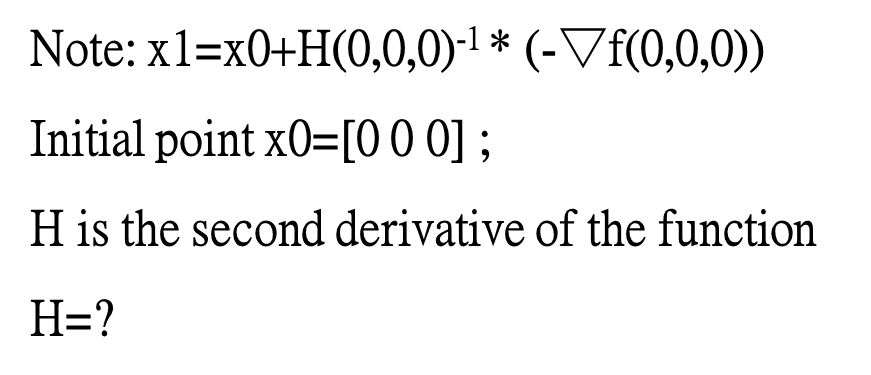
```

In [10]:
import numpy as np
from numpy.linalg import inv

def objective_function(x):
    """
    目標函數 f(x1, x2, x3) = (x1)^2 + x1(1 – x2) + (x2)^2 – x2x3 + (x3)^2 + x3
    """
    x1, x2, x3 = x
    return x1**2 + x1*(1 - x2) + x2**2 - x2*x3 + x3**2 + x3

def gradient(x):
    """
    計算梯度 ∇f = [2x₁ + 1 - x₂, -x₁ + 2x₂ - x₃, -x₂ + 2x₃ + 1]ᵀ
    """
    x1, x2, x3 = x
    return np.array([
        2*x1 + 1 - x2,
        -x1 + 2*x2 - x3,
        -x2 + 2*x3 + 1
    ])

def initial_hessian():
    """
    初始Hessian矩陣
    H = [2  -1   0]
        [-1  2  -1]
        [0  -1   2]
    """
    return np.array([
        [2, -1, 0],
        [-1, 2, -1],
        [0, -1, 2]
    ])

max_iter=100
tol=1e-6
print("\n開始執行Quasi-Newton方法...")
print("=" * 50)

# 步驟1: 初始化
print("\n步驟 1: 初始化")
x0 = np.array([0., 0., 0.])  # 初始點
print(f"初始點 x₀ = {x0}")

# 步驟2: 計算初始Hessian矩陣
print("\n步驟 2: 計算初始Hessian矩陣")
H = initial_hessian()
print("初始Hessian矩陣 H =")
print(H)

# 步驟3: 開始迭代
print("\n步驟 3: 開始迭代求解")
x = x0
iteration = 0

while iteration < max_iter:
    # 計算當前點的梯度
    g = gradient(x)
    print(f"\n迭代 {iteration + 1}:")
    print(f"當前點 x = {x}")
    print(f"梯度 ∇f = {g}")
    
    # 檢查收斂條件
    if np.linalg.norm(g) < tol:
        print("\n達到收斂條件！梯度接近於零。")
        break
        
    # 計算搜尋方向
    H_inv = inv(H)
    d = -np.dot(H_inv, g)
    print(f"搜尋方向 d = {d}")
    
    # 更新位置
    x_new = x + d
    print(f"新的位置 x_new = {x_new}")
    
    # 計算新位置的梯度
    g_new = gradient(x_new)
    
    # 計算差值向量
    s = x_new - x
    y = g_new - g
    
    # 更新Hessian矩陣 (在這個問題中，Hessian是常數，所以實際上不需要更新)
    # 但為了展示完整的Quasi-Newton方法，我們仍然保留這個步驟
    x = x_new
    iteration += 1
    
    # 輸出當前目標函數值
    current_value = objective_function(x)
    print(f"目標函數值 f(x) = {current_value}")

# 最終結果
print("\n" + "=" * 50)
print("最佳化求解完成！")
print(f"迭代次數: {iteration + 1}")
print(f"最佳解 x* = {x}")
print(f"最終目標函數值 f(x*) = {objective_function(x)}")
print(f"最終梯度範數 ||∇f(x*)|| = {np.linalg.norm(gradient(x))}")


開始執行Quasi-Newton方法...

步驟 1: 初始化
初始點 x₀ = [0. 0. 0.]

步驟 2: 計算初始Hessian矩陣
初始Hessian矩陣 H =
[[ 2 -1  0]
 [-1  2 -1]
 [ 0 -1  2]]

步驟 3: 開始迭代求解

迭代 1:
當前點 x = [0. 0. 0.]
梯度 ∇f = [1. 0. 1.]
搜尋方向 d = [-1. -1. -1.]
新的位置 x_new = [-1. -1. -1.]
目標函數值 f(x) = -1.0

迭代 2:
當前點 x = [-1. -1. -1.]
梯度 ∇f = [-1.11022302e-16  0.00000000e+00  3.33066907e-16]

達到收斂條件！梯度接近於零。

最佳化求解完成！
迭代次數: 2
最佳解 x* = [-1. -1. -1.]
最終目標函數值 f(x*) = -1.0
最終梯度範數 ||∇f(x*)|| = 3.510833468576701e-16


### (3) Check the SOC condition: So we have only one candidate point to check and the Hessian is
```
∇²f =
| 2  -1  0 |
|-1  2  -1 |
| 0  -1  2 |
```
```
Sufficient SOC Conditions for a Minimum:
The eigenvalues of this matrix are:
 λ₁, λ₂, λ₃  = ?
All of the eigenvalues are ? and  the
Hessian is positive or negative definite.
So, the point x* = [-1, -1, -1]  is a minimum
```

In [12]:
import numpy as np
from numpy.linalg import eigvals, det, eig


print("\n開始分析最小值點的充分條件...")
print("=" * 50)

# 步驟1: 定義Hessian矩陣
print("\n步驟 1: 定義Hessian矩陣")
H = np.array([
    [2, -1, 0],
    [-1, 2, -1],
    [0, -1, 2]
])
print("Hessian矩陣 =")
print(H)

# 步驟2: 計算特徵值
print("\n步驟 2: 計算特徵值")
eigenvalues, eigenvectors = eig(H)
# 排序特徵值，從小到大
eigenvalues = np.sort(eigenvalues)
print(f"特徵值 λ₁, λ₂, λ₃ = {eigenvalues}")

# 步驟3: 分析特徵值
print("\n步驟 3: 分析特徵值")
print(f"最小特徵值 λ₁ = {eigenvalues[0]:.4f}")
print(f"中間特徵值 λ₂ = {eigenvalues[1]:.4f}")
print(f"最大特徵值 λ₃ = {eigenvalues[2]:.4f}")

# 步驟4: 判定矩陣的正定性
print("\n步驟 4: 判定矩陣的正定性")
is_positive_definite = np.all(eigenvalues > 0)
if is_positive_definite:
    print("所有特徵值均為正數")
    print("因此，Hessian矩陣是正定的")
else:
    print("存在非正特徵值")
    print("因此，Hessian矩陣不是正定的")

# 步驟5: 驗證最小值點
print("\n步驟 5: 驗證最小值點")
x_min = np.array([-1, -1, -1])
print("候選點 x* =", x_min)

# 計算在此點的Hessian性質
print("\n步驟 6: 總結分析")
if is_positive_definite:
    print("結論：")
    print("1. 所有特徵值λ₁, λ₂, λ₃均為正數")
    print("2. Hessian矩陣在此點是正定的")
    print("3. 因此，點 x* = [-1, -1, -1] 確實是局部最小值點")
    print("\n進一步觀察：")
    print(f"- 特徵值範圍: [{eigenvalues[0]:.4f}, {eigenvalues[2]:.4f}]")
    print(f"- 矩陣條件數: {eigenvalues[2]/eigenvalues[0]:.4f}")
else:
    print("此點不滿足局部最小值的充分條件")
    
print( {
        'eigenvalues': eigenvalues,
        'is_minimum': is_positive_definite,
        'minimum_point': x_min
    })


開始分析最小值點的充分條件...

步驟 1: 定義Hessian矩陣
Hessian矩陣 =
[[ 2 -1  0]
 [-1  2 -1]
 [ 0 -1  2]]

步驟 2: 計算特徵值
特徵值 λ₁, λ₂, λ₃ = [0.58578644 2.         3.41421356]

步驟 3: 分析特徵值
最小特徵值 λ₁ = 0.5858
中間特徵值 λ₂ = 2.0000
最大特徵值 λ₃ = 3.4142

步驟 4: 判定矩陣的正定性
所有特徵值均為正數
因此，Hessian矩陣是正定的

步驟 5: 驗證最小值點
候選點 x* = [-1 -1 -1]

步驟 6: 總結分析
結論：
1. 所有特徵值λ₁, λ₂, λ₃均為正數
2. Hessian矩陣在此點是正定的
3. 因此，點 x* = [-1, -1, -1] 確實是局部最小值點

進一步觀察：
- 特徵值範圍: [0.5858, 3.4142]
- 矩陣條件數: 5.8284
{'eigenvalues': array([0.58578644, 2.        , 3.41421356]), 'is_minimum': True, 'minimum_point': array([-1, -1, -1])}
